Importing Dependcies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

Fetching The Data-set

In [2]:
# fetch dataset 
URL = 'https://archive.ics.uci.edu/static/public/45/data.csv'
raw_data = pd.read_csv(URL)
raw_data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


All the data-types are int or float so no need for labelencoding anything

- Checking for any missing values 

In [3]:
raw_data.isnull().sum() ## Aggaggregate the sum of nulls in each coulmn to check how much data is missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

- There are total of six missing values ----> No harm to drop all the nulls.
- Doing a correaltion step for feature importances.
- Plotting some statistical information.

<Axes: >

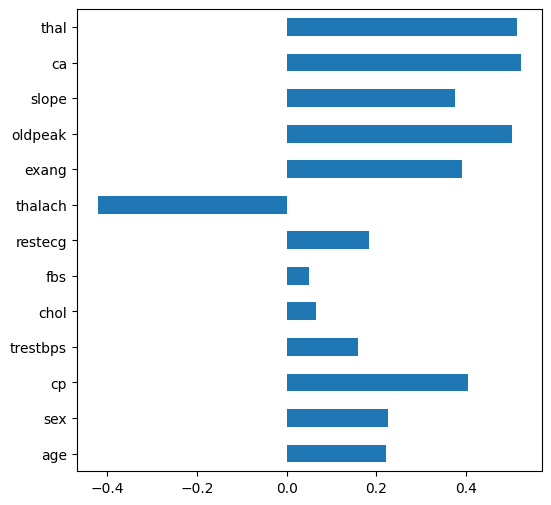

In [4]:
preprocessed_data = raw_data.dropna()
X = preprocessed_data.iloc[:, :13]
y = preprocessed_data.iloc[:,13]
X_scaled = StandardScaler().fit_transform(X)
corr_vals = preprocessed_data.corr()['num'].drop('num')
corr_vals.plot(kind='barh', figsize=(6, 6))

The lowest feature impact belongs to fbs (fasting blood sugar) while The highest impact belongs to thalach (maximum heart rate achieved)

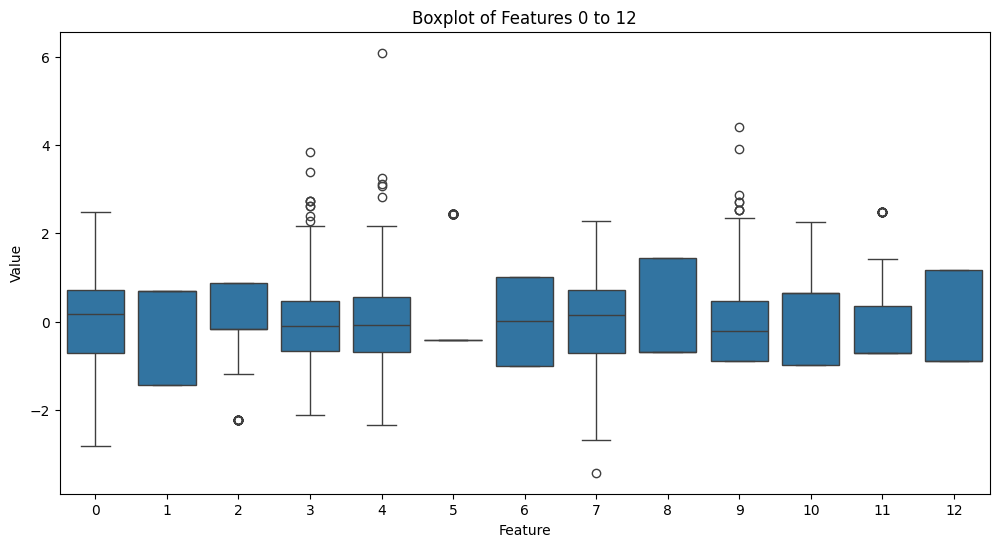

In [5]:
X_df = pd.DataFrame(X_scaled)

X_melted = X_df.melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(12,6))
sns.boxplot(x="Feature", y="Value", data=X_melted)
plt.title("Boxplot of Features 0 to 12")
plt.show()

Saving the Preprocessed Data as Pandas Dataframe (csv File).

In [6]:
#preprocessed_data['num'].iloc[:,13] = np.where(preprocessed_data['num'].iloc[:,13]>0,1,0) 
preprocessed_data.to_csv('heart_disease.csv',index=False)
